In [1]:
%matplotlib inline
import math
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

## Q1: The Human Eye

In [2]:
#Function inputs
width, height = map(int,input("Enter size(in inches): ").split())
wpix,hpix = map(int,input("Enter resolution: ").split())

KeyboardInterrupt: Interrupted by user

In [ ]:
def getOptDist(dim,pixdim,csf = 60):
    length = 2*csf*dim/pixdim #Length corresponding to selected csf value pixels
    distance = length/(2*math.tan(math.pi/(360)))
    return distance

print(getOptDist(width,wpix))    

## Q2: The Basics

### Images: Aerial(5.2.09), Airport(5.3.02),APC(7.1.08)
    

### Subquestions 1 to 6

In [2]:
img = mpimg.imread('5.2.09.tiff')
img2 = mpimg.imread('5.3.02.tiff')
img3 = mpimg.imread('7.1.08.tiff')
print(img)



[[255 255 255 ... 255 255 255]
 [198 202 192 ... 163 150 130]
 [182 203 195 ... 137 156 158]
 ...
 [174 153 187 ... 123  57  53]
 [173 179 169 ... 108  98  73]
 [171 177 178 ... 131 125 105]]


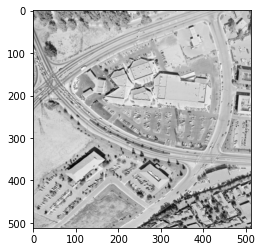

In [3]:
imgplot = plt.imshow(img,cmap = plt.cm.gray)

In [4]:
imgshape = np.shape(img) 
img2shape = np.shape(img2) #resolution
img3shape = np.shape(img3)
minpix = np.amin(img)
maxpix = np.amax(img)

In [5]:
compressed_size = []
compressed_size.append(os.path.getsize('5.2.09.tiff'))
compressed_size.append(os.path.getsize('5.3.02.tiff'))
compressed_size.append(os.path.getsize('7.1.08.tiff'))
print(compressed_size)

[262278, 1048710, 262278]


In [6]:
realsize = []
realsize.append(imgshape[0]*imgshape[1])
realsize.append(img2shape[0]*img2shape[1])
realsize.append(img3shape[0]*img3shape[1])

print(realsize)

[262144, 1048576, 262144]


### It is noticeable that real size is 134 bits smaller than compressed size in all cases since TIFF format increases the compressed size

### Q2.7(Bitplane Slicing)

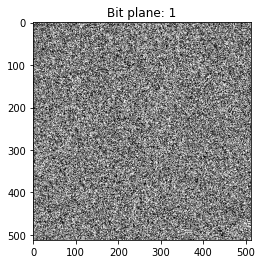

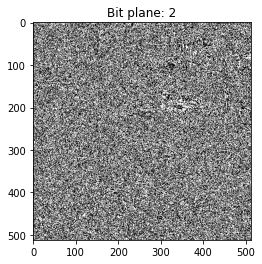

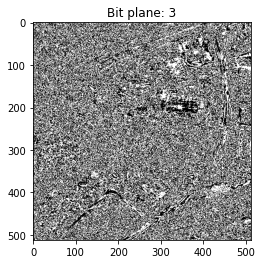

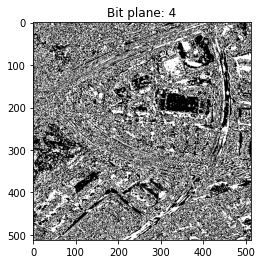

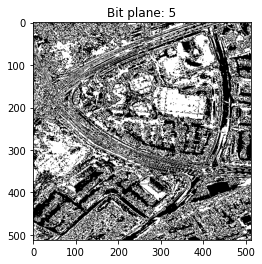

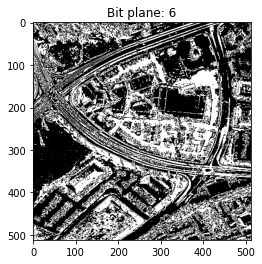

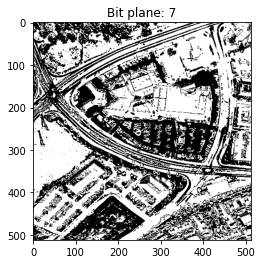

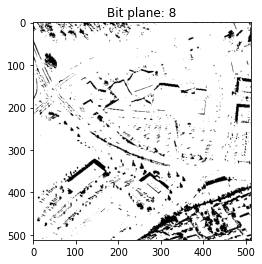

In [7]:
slices = plt.figure()
for k in range(7,-1,-1):
    bit_plane = np.zeros(imgshape)
    #slices.add_subplot(2,4, 8-k)
    plt.title("Bit plane: "+ str(8-k))
    for i in range(imgshape[0]):
        for j in range(imgshape[1]):
            bit_plane[i][j] = bin(img[i][j])[2:].zfill(8)[k]
    plt.imshow(bit_plane,cmap=plt.get_cmap('gray'))
    plt.show()

<class 'numpy.float64'>


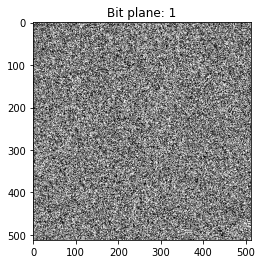

<class 'numpy.float64'>


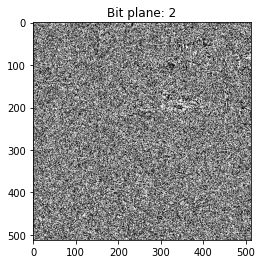

<class 'numpy.float64'>


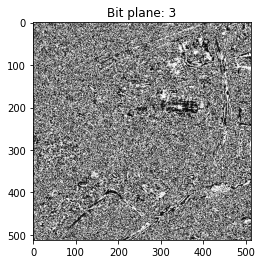

<class 'numpy.float64'>


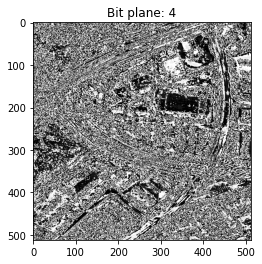

<class 'numpy.float64'>


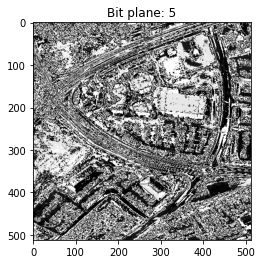

<class 'numpy.float64'>


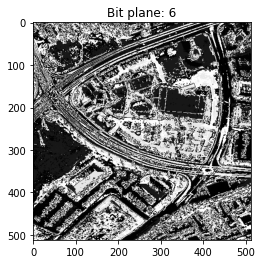

<class 'numpy.float64'>


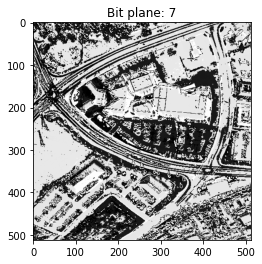

<class 'numpy.float64'>


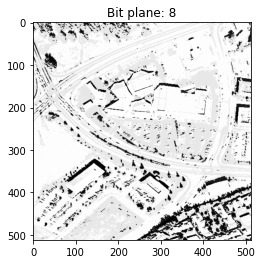

In [8]:
for k in range(8):
    bitplane = np.zeros(imgshape)
    plt.title("Bit plane: "+ str(k+1))
    for i in range(imgshape[0]):
        for j in range(imgshape[1]):
            bitplane[i][j] = bin(img[i][j])[2:].zfill(8)[-k-1:]
    plt.imshow(bitplane,cmap=plt.get_cmap('gray'))
    print(type(bitplane[i][j]))
    plt.show()
    
    


### Q2.8 (Bitplane Modification)

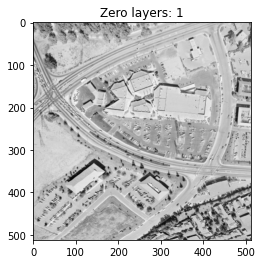

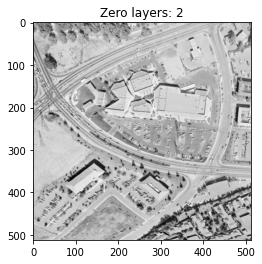

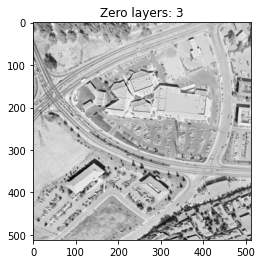

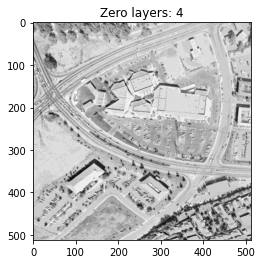

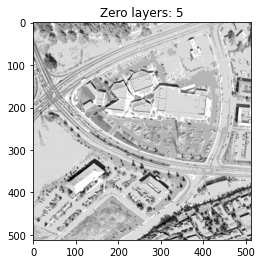

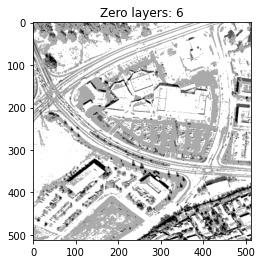

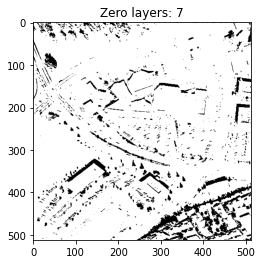

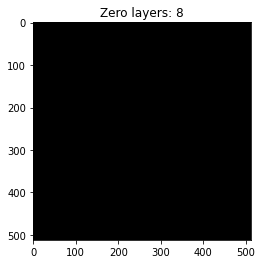

In [9]:
result = plt.figure()
for k in range(7,-1,-1):
    bitplanes = [[0] *imgshape[0]]*imgshape[1] # faced some accessing issue with numpy zeros so built the array differenctly
    #result.add_subplot(2,4, 8-k)
    plt.title("Zero layers: "+str(8-k))
    tempimg = np.zeros(imgshape) #image iterator
    for i in range(imgshape[0]):
        for j in range(imgshape[1]):
            bitplanes[i][j] = str(bin(img[i][j])[2:].zfill(8))[:k]+str(0)*(8-k)
            tempimg[i][j] = int(bitplanes[i][j],2)
    plt.imshow(tempimg,cmap=plt.get_cmap('gray'))
    plt.show()

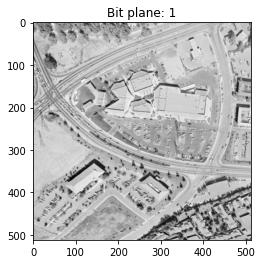

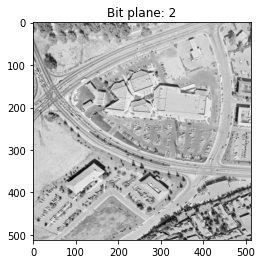

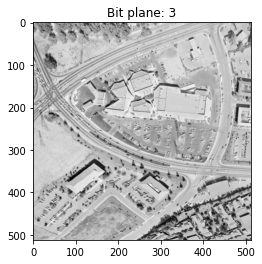

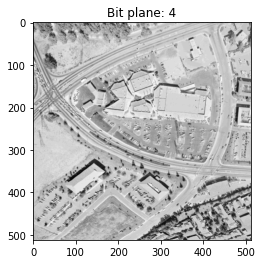

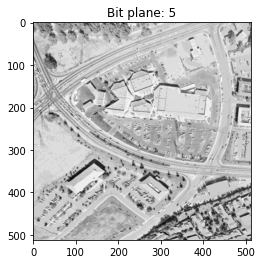

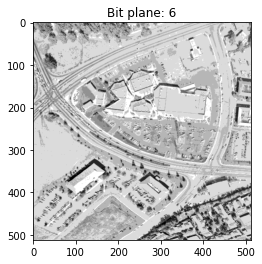

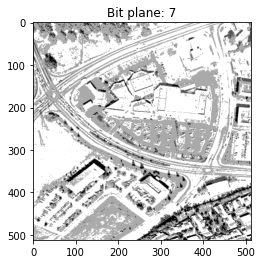

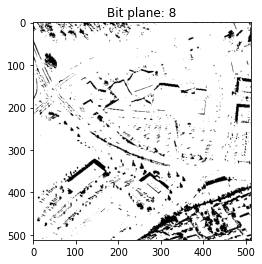

In [10]:
for k in range(0,8):
    bitplane = np.zeros(imgshape)
    plt.title("Bit plane: "+ str(k+1))
    tempimg = np.zeros(imgshape)
    for i in range(imgshape[0]):
        for j in range(imgshape[1]):
            bitplane[i][j] = bin(img[i][j])[2:].zfill(8)[0:8-k] + str(0)*(k+1)
            tempimg[i][j] = int(str(int(bitplane[i][j])),2)
    plt.imshow(tempimg,cmap=plt.get_cmap('gray'))
    plt.show()

### Q: 2.9 (Quantization)

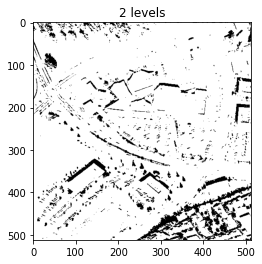

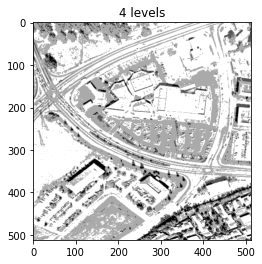

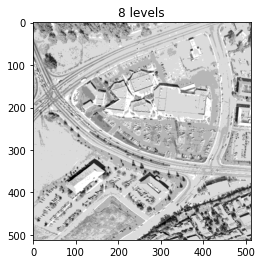

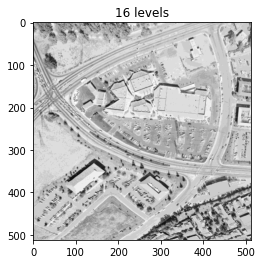

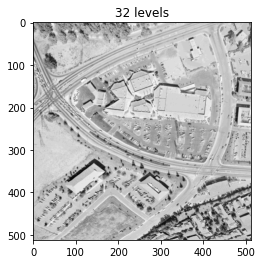

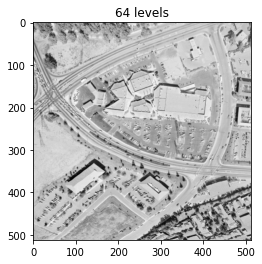

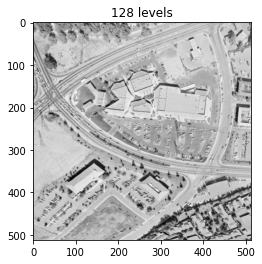

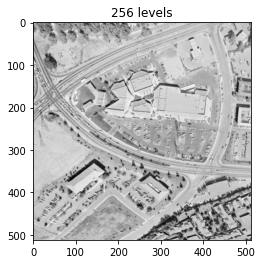

In [11]:
for k in range(1,9):
    plt.title(str(2**k)+" levels")
    requantized = np.zeros(imgshape)
    for i in range(imgshape[0]):
        for j in range(imgshape[1]):
            requantized[i][j] = math.floor(img[i][j]*(2**k)/256) 
    plt.imshow(requantized,cmap=plt.get_cmap('gray'))
    plt.show()

## Q3: Binary Morphology

### Images: Airplane(7.1.02),Truck(7.1.01),Airport(5.3.02),APC(7.1.08)

In [12]:
img1 = mpimg.imread('7.1.02.tiff')
img2 = mpimg.imread('5.3.02.tiff')
img3 = mpimg.imread('7.1.01.tiff')
img4 = mpimg.imread('7.1.08.tiff')

imglst = [img1,img2,img3,img4]


## Q: 3.1 (Histogram)

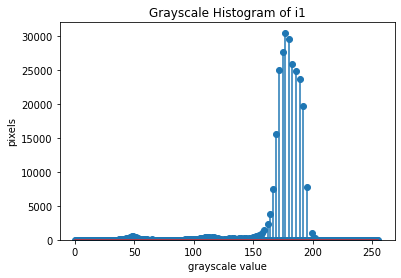

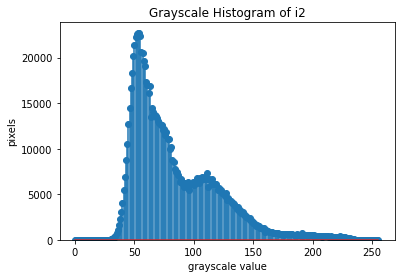

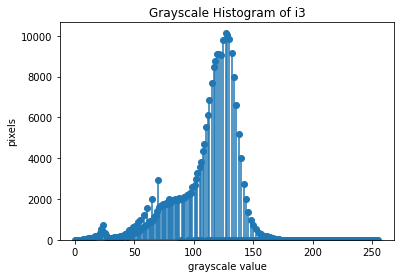

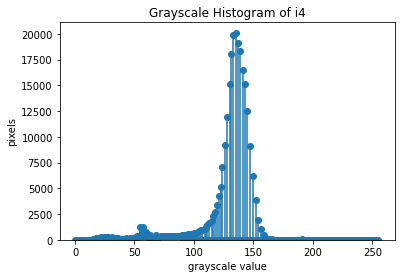

In [13]:
def imghist(image,k):
    histogram, bin_edges = np.histogram(image, bins=256, range=(0, 256))
    plt.figure()
    plt.xlabel("grayscale value")
    plt.title("Grayscale Histogram of i"+ str(k))
    plt.ylabel("pixels")
    #plt.xlim([0.0, 256.0])  
    plt.stem(bin_edges[0:-1], histogram)  
    plt.hist(histogram,bin_edges)
    plt.show()
    return

for i in range(4):
    imghist(imglst[i],i+1)

The parameter bins determines the histogram size, or the number of “bins” to use for the histogram. 

The parameter range is the range of values each of the pixels in the image can have. Here, we pass 0 and 1, which is the value range of our input image after transforming it to grayscale.

The modality of an image can be computed for its appearance, and / or its function.Modality of the first, second and fourth image is multimodal since it has so many peaks in values of intensity.
Modality of the third image appears to have two peaks, we can consider it as bimodal.

## Q: 3.2 (Binarize, Modal Thresholding)

[[ True  True False ...  True  True  True]
 [ True  True False ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


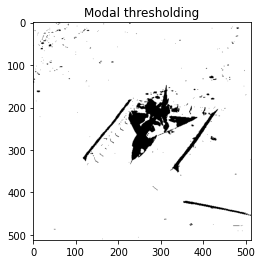

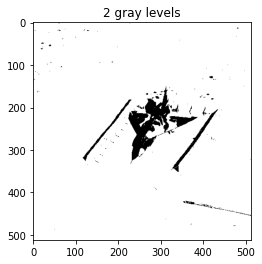

In [20]:
#image 1
threshold = 150
out1 = (img1 >= threshold) 
print(out1)
plt.title("Modal thresholding")
plt.imshow(out1,cmap=plt.get_cmap('gray'))
plt.show()
img1shape = np.shape(img1)
result = np.zeros(img1shape)
for i in range(img1shape[0]):
    for j in range(img1shape[1]):
        result[i][j] = math.floor(img1[i][j]*(2)/256) 
plt.title("2 gray levels")
plt.imshow(result,cmap=plt.get_cmap('gray'))
plt.show()

## Q: 3.3 (Connected Components Algorithm)

In [15]:
def ConnectedComponents(img_array):
    curr_label = 1;
    img_array = np.array(img_array)
    labels = np.array(img_array)

    # storing label conversions
    label_conv = []
    label_conv.append([])
    label_conv.append([])

    count = 0
    for i in range(1, len(img_array)):
        for j in range(1, len(img_array[0])):

            if img_array[i][j] > 0:
                label_x = labels[i][j - 1]
                label_y = labels[i - 1][j]

                if label_x > 0:
                    # both x and y have a label
                    if label_y > 0:

                        if not label_x == label_y:
                            labels[i][j] = min(label_x, label_y)
                            if max(label_x, label_y) not in label_conv[0]:
                                label_conv[0].append(max(label_x, label_y))
                                label_conv[1].append(min(label_x, label_y))
                            elif max(label_x, label_y) in label_conv[0]:
                                ind = label_conv[0].index(max(label_x, label_y))
                                if label_conv[1][ind] > min(label_x, label_y):
                                    l = label_conv[1][ind]
                                    label_conv[1][ind] = min(label_x, label_y)
                                    while l in label_conv[0] and count < 1000:
                                        count += 1
                                        ind = label_conv[0].index(l)
                                        l = label_conv[1][ind]
                                        label_conv[1][ind] = min(label_x, label_y)

                                    label_conv[0].append(l)
                                    label_conv[1].append(min(label_x, label_y))

                        else:
                            labels[i][j] = label_y
                    # only x has a label
                    else:
                        labels[i][j] = label_x

                # only y has a label
                elif label_y > 0:
                    labels[i][j] = label_y

                # neither x nor y has a label
                else:
                    labels[i][j] = curr_label
                    curr_label += 1

    # to make all the connected labels to have same value                
    count = 1
    for idx, val in enumerate(label_conv[0]):

        if label_conv[1][idx] in label_conv[0] and count < 100:
            count += 1
            ind = label_conv[0].index(label_conv[1][idx])
            label_conv[1][idx] = label_conv[1][ind]

    for i in range(1, len(labels)):
        for j in range(1, len(labels[0])):

            if labels[i][j] in label_conv[0]:
                ind = label_conv[0].index(labels[i][j])
                labels[i][j] = label_conv[1][ind]

    return labels

From the above Function we can get the labels of different foreground images that are not connected. So for each label we can give a different color to identify the different labels.The below function is used to color the labels with different colors just to identify different labels.

In [16]:
import random
random.seed(10)
def labelling(Image,labels):
    Imageshape = np.shape(Image)
    height, width = labels.shape
    colors = []
    colors.append([])
    colors.append([])
    color = 1

    coloured_img = np.zeros((Imageshape[0],Imageshape[1])) #Image.new("RGB", (width, height))

    for i in range(len(labels)):
        for j in range(len(labels[0])):
            if labels[i][j] > 0:
                if labels[i][j] not in colors[0]:
                    colors[0].append(labels[i][j])
                    colors[1].append(random.randint(0, 255))

                ind = colors[0].index(labels[i][j])
                coloured_img[i, j] = colors[1][ind]

    return coloured_img

To apply the connected compinent algorithm we need to first convert the image to binary using model thresholding.

In [17]:
def binarize(I,T):  
    B = np.zeros((len(I),len(I[0])))
    for i in range(len(I)):
        for j in range(len(I[0])):
            if(I[i][j]>=T):
                B[i][j]=0
            else:
                B[i][j]=1
    return B

Consider Airplane (7.1.02)

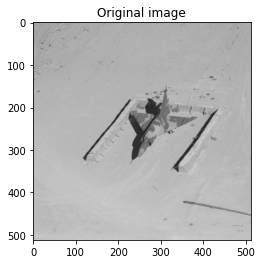

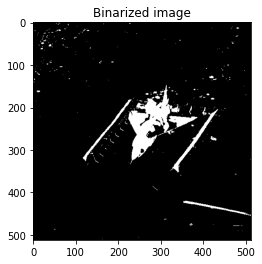

(512, 512)


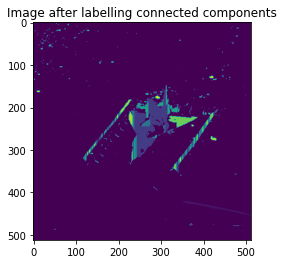

In [24]:
random.seed(10)
plt.imshow(img1,cmap=plt.get_cmap('gray'))
plt.title("Original image")
plt.show()
Binarized1 = binarize(img1,150)
plt.imshow(Binarized1,cmap=plt.get_cmap('gray'))
plt.title("Binarized image")
plt.show()
labels1 = ConnectedComponents(Binarized1)
print(np.shape(labels1))
labelled_img1 = labelling(img1,labels1)
plt.imshow(labelled_img1)
plt.title("Image after labelling connected components")
plt.show()

## Q: 3.4 (Minor Blob Removal)

In [90]:
def  removeMinorblobs(labels,threshold,I):    
    blobs = {}
    for i in range(len(labels)):
        for j in range(len(labels[0])):
            if labels[i][j] not in blobs:
                blobs[labels[i][j]]=1
            else:
                blobs[labels[i][j]]+=1
    minor = []
    for k in blobs.keys():
        if(blobs[k]<threshold):
            minor.append(k)
    for i in range(len(labels)):
        for j in range(len(labels[0])):
            if labels[i][j] in minor:
                labels[i][j] = 0.0
    height, width = labels.shape
    colors = []
    colors.append([])
    colors.append([])
    color = 1
    coloured_img = np.zeros((len(I),len(I[0])))
    for i in range(len(labels)):
        for j in range(len(labels[0])):
            if labels[i][j] > 0:
                if labels[i][j] not in colors[0]:
                    colors[0].append(labels[i][j])
                    colors[1].append(255)

                ind = colors[0].index(labels[i][j])
                coloured_img[i, j] = colors[1][ind]

    return coloured_img

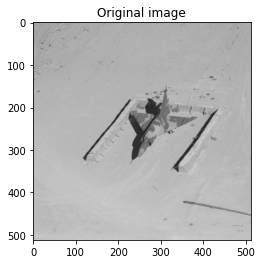

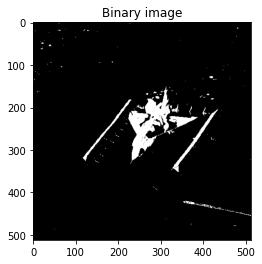

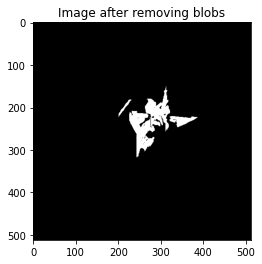

In [91]:
plt.imshow(img1,cmap=plt.get_cmap('gray'))
plt.title("Original image")
plt.show()
plt.imshow(Binarized1,cmap=plt.get_cmap('gray'))
plt.title("Binary image")
plt.show()
removed_blobs_1 = removeMinorblobs(labels1,150,img1)
plt.imshow(removed_blobs_1,cmap=plt.get_cmap('gray'))
plt.title("Image after removing blobs")
plt.show()

## Q: 3.8(Object of interest)

In [95]:
def count_pixels(img,threshold):
    imgshape = np.shape(img)
    blobs = {}
    for i in range(imgshape[0]):
        for j in range(imgshape[1]):
            if img[i][j] not in blobs:
                blobs[img[i][j]]=1
            else:
                blobs[img[i][j]]+=1
    minor = []
    major = []                  
    for k in blobs.keys():
        if(blobs[k]<threshold):
            minor.append(k)
        else:
            major.append(blobs[k])
    for i in range(imgshape[0]):
        for j in range(imgshape[1]):
            if img[i][j] in minor:
                img[i][j] = 0.0
    labelled_img = labelling(img4,img)
    fig,ax = plt.subplots()
    ax.imshow(labelled_img,cmap=plt.get_cmap('gray'))
    plt.show()
    return major

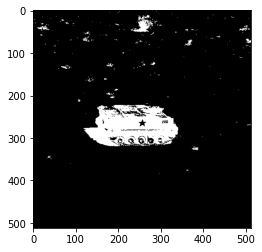

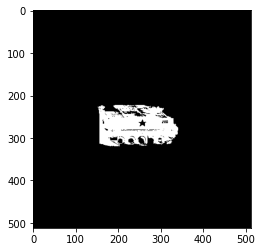

Number of pixels in APC-Military vehicle is around: 12970


In [97]:
img4shape = np.shape(img4)
Binarized4 = np.zeros((img4shape[0],img4shape[1]))
for i in range(img4shape[0]):
    for j in range(img4shape[1]):
        if(img4[i][j]>75):
            Binarized4[i][j]=0
        else:
            Binarized4[i][j]=1
fig,ax = plt.subplots()
ax.imshow(Binarized4,cmap=plt.get_cmap('gray'))
plt.show()
labels = ConnectedComponents(Binarized4)
number_of_majority_pixels = count_pixels(labels,5000)

print("Number of pixels in APC-Military vehicle is around: "+str(number_of_majority_pixels[1]))